In [4]:
import pandas as pd

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv('../data/prepared_data.csv')
df

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration,Major_Brand_Proportion_2023,Major_Model_Proportion_2023,BEV,PHEV
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.2,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,2555.4,12741.6,819.6,0.895833,0.604167,35.0,13.0
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.0,0.6,0.0,0.000000,0.000000,0.0,0.0
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.0,0.8,0.0,0.000000,0.000000,0.0,0.0
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,1496.6,13760.4,1388.8,0.808219,0.506849,47.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,397.2,3329.4,335.0,0.816667,0.583333,38.0,22.0
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,4954.0,35607.0,2990.6,0.826087,0.556064,294.0,143.0
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,20917.8,140271.0,11117.8,0.848107,0.602869,3169.0,1084.0
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,2570.0,21883.0,2137.2,0.865269,0.589820,220.0,114.0


In [11]:
df['EV_Proportion'] = df['Electric_Vehicle_Count'] / df['Total_Transactions']

threshold = df['EV_Proportion'].describe()['75%']
df['EV_High_Low'] = (df['EV_Proportion'] > threshold).astype(int)

# Features and target variable
X = df.drop(columns=['County', 'Electric_Vehicle_Count', 'High_EV_Adoption'])
y = df['High_EV_Adoption']


In [12]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logistic_cv = LogisticRegressionCV(cv=5, penalty='l2', scoring='accuracy', random_state=42)
logistic_cv.fit(X_train, y_train)

predictions = logistic_cv.predict(X_test)
report = classification_report(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

report, cm


('              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96        13\n           1       1.00      0.86      0.92         7\n\n    accuracy                           0.95        20\n   macro avg       0.96      0.93      0.94        20\nweighted avg       0.95      0.95      0.95        20\n',
 array([[13,  0],
        [ 1,  6]], dtype=int64))

In [13]:
# Extracting coefficients from the logistic regression model
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_cv.coef_[0]
})

feature_coefficients


,Feature,Coefficient
0,Total_Transactions,0.083078
1,Second_Electric_Vehicle_Count,0.041935
2,Make_Model_Count,0.338877
3,EV_Annual_Growth_Rate,0.284872
4,Passenger_Ratio,-0.055294
5,Registration at Time of Transfer,0.097988
6,Registration Renewal,0.083618
7,Original Registration,0.066184
8,Major_Brand_Proportion_2023,0.515108
9,Major_Model_Proportion_2023,0.435046


### extra K-means

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\a

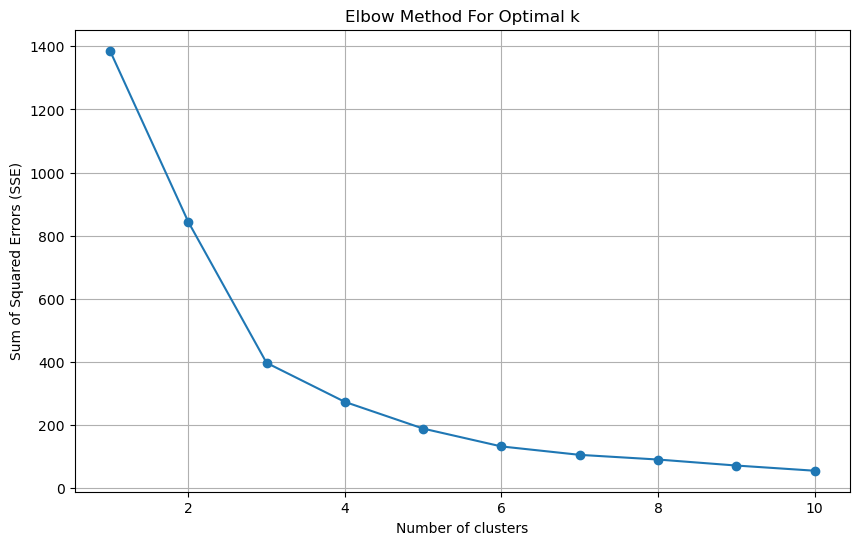

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate the sum of squared distances for different number of clusters
def elbow_method(data, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

# Define the range of k
k_range = range(1, 11)

# Calculate SSE for each k
sse = elbow_method(X_scaled, k_range)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


In [26]:
# Running K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)



d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ 1.75717460e+03,  3.18888889e+01,  2.88380952e+01,
        -2.79587970e-03,  7.34171916e-01,  3.37492063e+01,
         2.89930159e+02,  2.75269841e+01,  4.35828441e-02,
         1.79658621e-02,  1.04761905e+00,  4.12698413e-01,
         9.47491525e-05,  3.33066907e-16],
       [ 5.80190914e+05,  1.83661714e+04,  1.63045143e+03,
         1.02562796e-01,  6.79793295e-01,  1.42208514e+04,
         9.33745257e+04,  8.09854857e+03,  8.46109393e-01,
         6.05988565e-01,  1.82694286e+03,  5.91371429e+02,
         8.68699815e-03,  6.85714286e-01],
       [ 6.98693900e+06,  4.16266000e+05,  3.67640000e+03,
         4.56459769e-02,  8.43184261e-01,  1.38250600e+05,
         1.11577580e+06,  1.15044800e+05,  8.42139314e-01,
         6.43001941e-01,  7.49420000e+04,  1.77980000e+04,
         3.51514447e-02,  1.00000000e+00]])

In [31]:
df

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration,Major_Brand_Proportion_2023,Major_Model_Proportion_2023,BEV,PHEV,High_EV_Adoption,EV_Proportion,EV_High_Low,Cluster
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.2,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0,0
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,2555.4,12741.6,819.6,0.895833,0.604167,35.0,13.0,1,0.001721,0,1
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.0,0.6,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0,0
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.0,0.8,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0,0
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,1496.6,13760.4,1388.8,0.808219,0.506849,47.0,26.0,1,0.002569,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,397.2,3329.4,335.0,0.816667,0.583333,38.0,22.0,1,0.007033,1,1
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,4954.0,35607.0,2990.6,0.826087,0.556064,294.0,143.0,1,0.005600,1,1
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,20917.8,140271.0,11117.8,0.848107,0.602869,3169.0,1084.0,1,0.014107,1,1
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,2570.0,21883.0,2137.2,0.865269,0.589820,220.0,114.0,1,0.006048,1,1


In [33]:

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Calculating the mean of features for each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Count'] = df['Cluster'].value_counts()
cluster_centers

,Total_Transactions,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration,Major_Brand_Proportion_2023,Major_Model_Proportion_2023,BEV,PHEV,EV_Proportion,EV_High_Low,Count
0,1.757175e+03,31.888889,28.838095,-0.002796,0.734172,33.749206,2.899302e+02,27.526984,0.043583,0.017966,1.047619,0.412698,0.000095,3.330669e-16,63
1,5.801909e+05,18366.171429,1630.451429,0.102563,0.679793,14220.851429,9.337453e+04,8098.548571,0.846109,0.605989,1826.942857,591.371429,0.008687,6.857143e-01,35
2,6.986939e+06,416266.000000,3676.400000,0.045646,0.843184,138250.600000,1.115776e+06,115044.800000,0.842139,0.643002,74942.000000,17798.000000,0.035151,1.000000e+00,1


In [50]:
import plotly.express as px
import geopandas as gpd
import pandas as pd


counties = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
counties = counties[counties['STATE'] == '53']  # FIPS code for Washington


In [51]:

# Merge your data with the GeoJSON
counties['NAME'] = counties['NAME'].str.title()
merged_data = counties.merge(df, left_on='NAME', right_on='County')


In [53]:
fig = px.choropleth(merged_data,
                    geojson=counties.geometry,
                    locations=merged_data.index,
                    color='Cluster',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'Cluster': 'Cluster'}
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='Cluster Distribution of Washington Counties')
fig.show()
